In [10]:
import scipy.io as sio
import os

cylinder_all = sio.loadmat(os.path.join('..', 'DATA 2', 'FLUIDS', 'CYLINDER_ALL.mat'))
print(cylinder_all['UALL'].shape)

(89351, 151)


In [102]:
from PIL import Image
import numpy as np

n = int(cylinder_all['n'])
m = int(cylinder_all['m'])

new_size = (int(n / 20), int(m / 20))
print(new_size)

compressed_cylinder_all = np.array([np.array(Image.fromarray(u.reshape(n, m).T).resize(size=new_size)).T.flatten() for u in cylinder_all['UALL'].T]).T

(22, 9)


/var/folders/h3/qyrdxv051fz35f8dd5n618b00000gn/T/ipykernel_28016/2740378603.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(cylinder_all['n'])
/var/folders/h3/qyrdxv051fz35f8dd5n618b00000gn/T/ipykernel_28016/2740378603.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(cylinder_all['m'])


In [103]:
compressed_cylinder_all.shape

(198, 151)

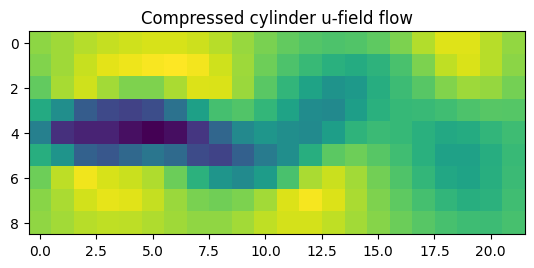

In [141]:
from matplotlib.animation import FuncAnimation
from matplotlib import pyplot as plt
from IPython.display import HTML

fig = plt.figure()
ax1 = plt.imshow(compressed_cylinder_all[:, 0].reshape(new_size).T, cmap='viridis')
plt.title('Compressed cylinder u-field flow')

def update(frame):
    ax1.set_data(compressed_cylinder_all[:, frame].reshape(new_size).T)
    return ax1

ani = FuncAnimation(fig, update, frames=compressed_cylinder_all.shape[1], interval=100)

HTML(ani.to_jshtml())

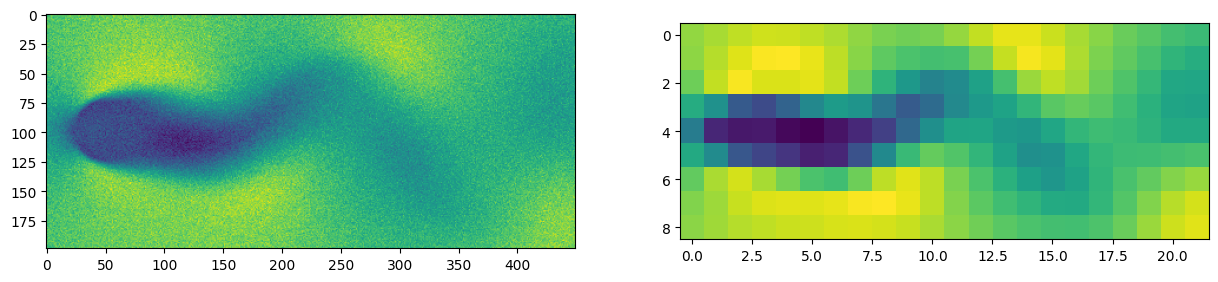

In [153]:
snapshot = cylinder_all['UALL'][:, 20]
snapshot_with_noise = snapshot + np.random.randn(*snapshot.shape) * 0.1

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(snapshot_with_noise.reshape(n, m).T, cmap='viridis')
compressed_snapshot = np.array(Image.fromarray(snapshot_with_noise.reshape(n, m).T).resize(size=new_size)).T.flatten()
axs[1].imshow(compressed_snapshot.reshape(new_size).T, cmap='viridis')

In [154]:

from scipy.optimize import minimize

Theta = compressed_cylinder_all.astype(np.float64)

def L1_norm(x):
    return np.linalg.norm(x, ord=1)

y1 = compressed_snapshot.astype(np.float64)
x0 = np.linalg.pinv(Theta) @ y1
x0 = x0.astype(np.float64)

eps = 500

constraint = {'type': 'ineq', 'fun': lambda x: eps - np.linalg.norm(Theta @ x - y1, ord=2)}

res = minimize(L1_norm, x0, method="SLSQP", constraints=constraint)

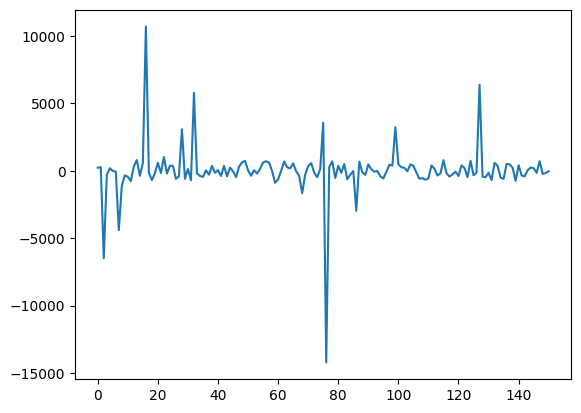

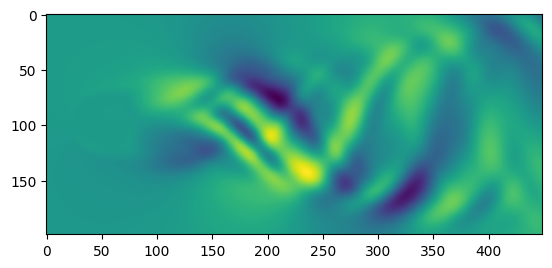

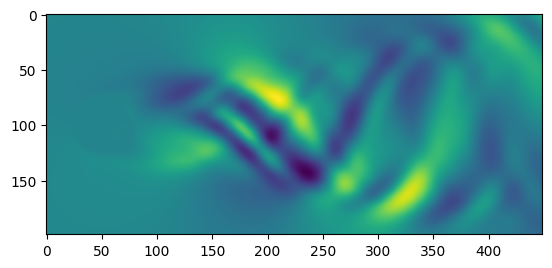

In [169]:
s0 = res.x
plt.figure()
plt.plot(s0)
plt.figure()
plt.imshow((cylinder_all['UALL'] @ s0).reshape(n, m).T, cmap='viridis')
plt.figure()
plt.imshow((cylinder_all['UALL'][:, 20] - (cylinder_all['UALL'] @ s0)).reshape(n, m).T, cmap='viridis')
plt.show()